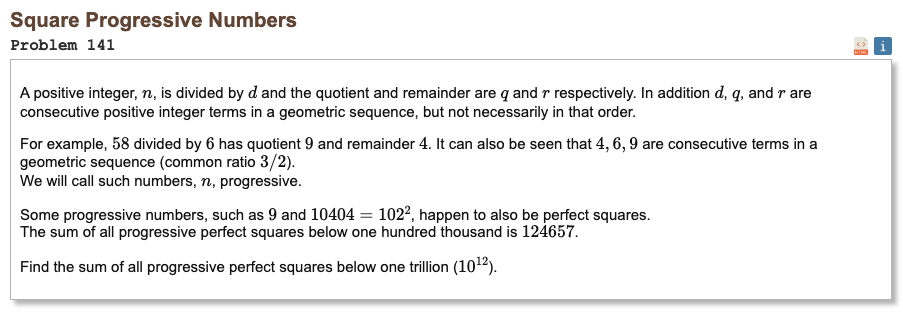

## Initial approach

* write the gp condition as q = a^2, d = a b, r = b^2 with 0 < b < a so q d + r = a^3 b + b^2 is progressive
* we need a^3 b + b^2 to be a square so b and a^3 + b must share the same squarefree part
* set b = t u^2 and a^3 + b = t v^2 with squarefree t then a^3 = t(v^2 − u^2) = t(v − u)(v + u)
* for each a the allowed t are squarefree divisors of a^3 which are exactly the products of distinct primes dividing a
* for each t factor M = a^3 / t and split M as s · t2 with s and t2 same parity to get u = (t2 − s)/2 and v = (t2 + s)/2
* build b = t u^2 with b < a and gcd(a, b) = 1 then n = b(a^3 + b) is a square candidate
* collect unique n below 10^12 and sum them

In [1]:
%%time

import math

LIMIT = 10**12
A_MAX = int(LIMIT ** (1/3)) + 2

def spf_sieve(n):
    spf = list(range(n + 1))
    for i in range(2, int(n**0.5) + 1):
        if spf[i] == i:
            step = i
            start = i * i
            for j in range(start, n + 1, step):
                if spf[j] == j:
                    spf[j] = i
    return spf

def factorize_with_spf(x, spf):
    f = {}
    while x > 1:
        p = spf[x]
        c = 0
        while x % p == 0:
            x //= p
            c += 1
        f[p] = f.get(p, 0) + c
    return f

def unique_primes_of_a(a, spf):
    f = factorize_with_spf(a, spf)
    return list(f.keys()), f

def all_squarefree_divisors_from_primes(primes):
    ds = [1]
    for p in primes:
        ds += [d * p for d in ds]
    return ds

def gen_divisors_from_exp(expmap):
    items = list(expmap.items())
    divs = [1]
    for p, e in items:
        cur = []
        pe = 1
        for _ in range(e + 1):
            for d in divs:
                cur.append(d * pe)
            pe *= p
        divs = cur
    return divs

def solve():
    spf = spf_sieve(A_MAX)
    squares = set()
    for a in range(2, A_MAX):
        primes, a_factors = unique_primes_of_a(a, spf)
        ts = all_squarefree_divisors_from_primes(primes)
        a3_factors = {p: 3 * e for p, e in a_factors.items()}
        for t in ts:
            tf = {}
            tt = t
            for p in primes:
                if tt % p == 0:
                    tf[p] = 1
                    tt //= p
            m_exp = {}
            for p, e in a3_factors.items():
                m_exp[p] = e - tf.get(p, 0)
            M = 1
            for p, e in m_exp.items():
                M *= p ** e
            divs = gen_divisors_from_exp(m_exp)
            for s in divs:
                t2 = M // s
                if s > t2:
                    continue
                if (s + t2) & 1:
                    continue
                u = (t2 - s) // 2
                v = (t2 + s) // 2
                if u <= 0:
                    continue
                b = t * u * u
                if b >= a:
                    continue
                if math.gcd(a, b) != 1:
                    continue
                n = b * (a * a * a + b)
                if n >= LIMIT:
                    continue
                rt = math.isqrt(n)
                if rt * rt == n:
                    squares.add(n)
    return sum(s for s in squares if s < LIMIT)

result = solve()
print("Result:", result)

Result: 576090
CPU times: user 905 ms, sys: 5.34 ms, total: 910 ms
Wall time: 910 ms
